<code>
Model	MAE	MSE	RMSE	R2	RMSLE	MAPE	TT (Sec)
<br>huber	Huber Regressor	176.5214	87177.3210	295.2018	0.9995	0.0076	0.0048	0.2767
<br>omp	Orthogonal Matching Pursuit	176.8994	87074.0508	295.0281	0.9995	0.0076	0.0048	0.2200
<br>llar	Lasso Least Angle Regression	176.9285	87099.6957	295.0704	0.9995	0.0076	0.0048	0.2167
<br>lasso	Lasso Regression	176.9336	87099.0767	295.0690	0.9995	0.0076	0.0048	0.3600
<br>lr	Linear Regression	176.9777	87128.9787	295.1192	0.9995	0.0076	0.0048	0.3633
<br>lar	Least Angle Regression	176.9777	87128.9787	295.1192	0.9995	0.0076	0.0048	0.4300
<br>br	Bayesian Ridge	176.9778	87128.8999	295.1190	0.9995	0.0076	0.0048	0.2533
<br>ridge	Ridge Regression	177.0186	87108.0300	295.0839	0.9995	0.0076	0.0048	0.3833
<br>par	Passive Aggressive Regressor	177.6973	87356.2870	295.5045	0.9995	0.0076	0.0048	0.2000
<br>lightgbm	Light Gradient Boosting Machine	195.5358	99140.7557	314.6561	0.9995	0.0081	0.0053	0.9300
<br>rf	Random Forest Regressor	199.4361	101335.1889	318.2649	0.9994	0.0083	0.0054	5.1033
<br>gbr	Gradient Boosting Regressor	201.3509	99449.4057	315.2657	0.9995	0.0083	0.0056	1.7800
<br>et	Extra Trees Regressor	201.5587	105765.2161	325.1893	0.9994	0.0084	0.0054	2.1867
<br>xgboost	Extreme Gradient Boosting	210.7075	108984.0729	329.9108	0.9994	0.0086	0.0058	1.3700
<br>dt	Decision Tree Regressor	263.7993	175515.6021	418.9104	0.9990	0.0109	0.0072	0.2100
<br>catboost	CatBoost Regressor	364.3085	253714.2094	503.3081	0.9986	0.0134	0.0103	17.0400
<br>ada	AdaBoost Regressor	615.4694	637822.1677	798.6293	0.9965	0.0349	0.0231	0.8600
<br>knn	K Neighbors Regressor	772.0608	1201267.8542	1074.7690	0.9934	0.0333	0.0234	0.2367
<br>en	Elastic Net	3640.4392	18414889.5698	4291.1610	0.8990	0.1410	0.1205	0.3700
<br>dummy	Dummy Regressor	11623.2256	182392298.6667	13505.1523	-0.0005	0.4012	0.3887	0.2167
</code>

In [1]:
import sys
sys.path.insert(0, sys.path[0].removesuffix('/src/crypto'))
print(sys.path)

from pycaret.regression import *
from src.utils import *
import plotly.express as px

['/home/marcelo/des/analise_ativos_mercado_financeiro', '/home/marcelo/des/analise_ativos_mercado_financeiro/src/crypto', '/usr/lib64/python310.zip', '/usr/lib64/python3.10', '/usr/lib64/python3.10/lib-dynload', '', '/home/marcelo/des/analise_ativos_mercado_financeiro/env/lib64/python3.10/site-packages', '/home/marcelo/des/analise_ativos_mercado_financeiro/env/lib/python3.10/site-packages', '/home/marcelo/des/analise_ativos_mercado_financeiro/env/lib/python3.10/site-packages/IPython/extensions', '/home/marcelo/.ipython']


In [2]:
# Variables
datadir = './data'
test_dir = './test'
label = 'close'
regression_times = 24*14
days_to_forecasting = 2

### Metadata

<code>
Field Name - Description</br>
open_time - Kline Open time in unix time format</br>
open - Open Price</br>
high - High Price</br>
low	- Low Price</br>
close	- Close Price</br>
volume - Volume</br>
close_time - Kline Close time in unix time format</br>
quote_volume - Quote Asset Volume</br>
count	- Number of Trades</br>
taker_buy_volume - Taker buy base asset volume during this period</br>
taker_buy_quote_volume - Taker buy quote asset volume during this period</br>
ignore - Ignore</br>
</code>

In [3]:
use_cols = ['open_time',  'close']
print(use_cols)
data = read_data(datadir, use_cols=use_cols)
data.head()

['open_time', 'close']


,open_time,close
0,2021-01-01 00:00:00,28995.13
1,2021-01-01 01:00:00,29409.99
2,2021-01-01 02:00:00,29194.65
3,2021-01-01 03:00:00,29278.40
4,2021-01-01 04:00:00,29220.31


In [4]:
#data = calc_RSI(data, label)
data.dropna(inplace=True)
print(data.info())
data.tail(1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21850 entries, 0 to 21849
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   open_time  21850 non-null  datetime64[ns]
 1   close      21850 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 341.5 KB
None


,open_time,close
21849,2023-06-30 23:00:00,30472.0


In [5]:
features = data.columns.drop(['open_time', 'close']).tolist()
print(features)

[]


In [6]:
cut_index = 524 +48+24

validation_data = read_data(test_dir, use_cols=use_cols)
data = pd.concat([data, validation_data.loc[validation_data.index <=cut_index]])
validation_data = validation_data.drop( validation_data.loc[validation_data.index <= cut_index].index )

validation_data = validation_data.sort_values('open_time').reset_index(drop=True)
data = data.sort_values('open_time').reset_index(drop=True)

print(data.info())
#test_data = calc_RSI(test_data, label)
#validation_data.dropna(inplace=True)
print(validation_data.info())
validation_data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22447 entries, 0 to 22446
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   open_time  22447 non-null  datetime64[ns]
 1   close      22447 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 350.9 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   open_time  147 non-null    datetime64[ns]
 1   close      147 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.4 KB
None


,open_time,close
0,2023-07-25 21:00:00,29228.93
1,2023-07-25 22:00:00,29206.46
2,2023-07-25 23:00:00,29228.91
3,2023-07-26 00:00:00,29166.76
4,2023-07-26 01:00:00,29131.01
...,...,...
142,2023-07-31 19:00:00,29157.48
143,2023-07-31 20:00:00,29208.27
144,2023-07-31 21:00:00,29243.31
145,2023-07-31 22:00:00,29209.99


lightgbm,0.9245669704449424
ransac,0.9307958184672452
lr,0.9390178731190032
br,0.9443476762573038
lar,0.9492107752862536
rf,0.9611762069705837
et,0.9617265438315517
gbr,0.964064753714489
xgboost,0.9677531861170903
ridge,0.9680058491786502
ada,0.9780636390202075
ard,0.9809946396743481
omp,0.9924010327397162
llar,0.9981280703091872
lasso,1.0211292308564999
en,1.0250608630535183
huber,1.2774587533287396
svm,1.3615563150926815
catboost,1.404995664107966
tr,1.6636255165070548
dt,2.1225503602279043
par,3.4973830079630055
knn,6.094219413796779
kr,4696.8237747577605
mlp,1201821.4305035255

In [7]:
#regressor_list = ['lr', 'lasso', 'ridge', 'en', 'lar', 'llar', 'omp', 'br', 'ard', 'par', 'ransac', 'tr',
#                  'huber', 'kr', 'svm', 'knn', 'dt', 'rf', 'et', 'ada', 'gbr', 'mlp', 'xgboost', 'lightgbm', 'catboost']

# regressor_list = ['ransac', 'lr']
regressor_list = ['lr']

diff = {}
predict_data = None
model= None
setup= None
for regs in regressor_list:
    print('Calculating: ', regs)
    predict_data, model, setup = forecast2(data=data.copy(), fh=24 * days_to_forecasting, label=label,
                                numeric_features=features.copy(), regression_times=regression_times, regressor_estimator=regs)
    df_diff = plot_predic_model(predict_data, validation_data, regs)
    diff[regs] = df_diff['diff'].std()
    print(regs, ': - Desvio padrão: ', diff[regs])

df_result = pd.DataFrame.from_dict(diff, orient='index', columns=['diff']).sort_values('diff')
df_result.to_csv('diff.csv')
print(df_result)

Calculating:  lr
Transformation Pipeline and Model Successfully Saved


lr : - Desvio padrão:  0.5585111441783092
        diff
lr  0.558511


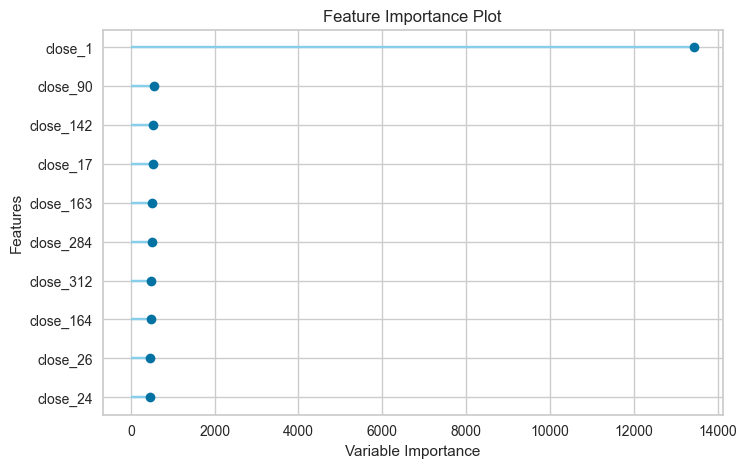

In [8]:
setup.plot_model(model, plot='feature')